# Classification

We consider the same QWS dataset. Our dataset is multiclass problem not binary {Service Classification : 1,2,3 and 4 corresponding to Platinum (High quality), Gold,Silver and Bronze (Low quality)}

#### Cleaning 

In [1]:
from  DataCleaning import  cleanData
X,y,features,target=cleanData('Classification')
features_copy=features.copy()
X_copy=X.copy()
y_copy=y.copy()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

##### Independent and dependent variables

In [3]:
X.head()

,Availability,Throughput,Successability,Compliance,Best_Practices,Latency,Documentation,WsRF,Reliability,Response_Time
1,100,14.6,88,78.0,80,64.42,86,93,85.5,71.75
2,100,23.4,83,100.0,87,111.00,59,90,88.0,117.00
4,100,5.4,83,100.0,75,63.00,91,90,79.3,70.00
5,100,18.2,80,78.0,84,104.60,91,90,92.2,105.20
8,100,13.7,80,78.0,83,62.40,89,89,76.3,99.20


In [4]:
y.head()

,Class
1,1
2,1
4,1
5,1
8,1


<b>Convert dataframe to array</b>

In [5]:
X = X.values
y = y.values

In [6]:
type(X)

numpy.ndarray

In [7]:
X[0:5,:]

array([[100.  ,  14.6 ,  88.  ,  78.  ,  80.  ,  64.42,  86.  ,  93.  ,
         85.5 ,  71.75],
       [100.  ,  23.4 ,  83.  , 100.  ,  87.  , 111.  ,  59.  ,  90.  ,
         88.  , 117.  ],
       [100.  ,   5.4 ,  83.  , 100.  ,  75.  ,  63.  ,  91.  ,  90.  ,
         79.3 ,  70.  ],
       [100.  ,  18.2 ,  80.  ,  78.  ,  84.  , 104.6 ,  91.  ,  90.  ,
         92.2 , 105.2 ],
       [100.  ,  13.7 ,  80.  ,  78.  ,  83.  ,  62.4 ,  89.  ,  89.  ,
         76.3 ,  99.2 ]])

**Train test split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_test[0:5,:].astype(int)

array([[100,  12,  78,  78,  80, 125,  90,  83,  75, 125],
       [100,   1,  93,  78,  74, 376,  88,  66,  26, 553],
       [100,   0,  75,  78,  80, 119,  64,  73,  72, 120],
       [ 79,   1,  44,  67,  84,  65,  39,  63,  66, 164],
       [ 70,   5,  62,  89,  84, 113,  13,  65,  77, 150]])

In [11]:
y.mean()

2.642105263157895

In [12]:
y_train.mean()

2.6447368421052633

In [13]:
y_test.mean()

2.6315789473684212

**Features scaling**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [16]:
X_train[0,:]

array([100. ,  15. ,  71. ,  89. ,  77. ,  74.5,  41. ,  84. ,  82.2,
        75. ])

In [17]:
X_train_sc_ligne0 = X_train_sc[0,:]

In [18]:
X_train_sc_ligne0

array([ 0.79028524,  1.330657  ,  0.18692013,  0.63024327, -0.46434682,
       -0.93881031, -0.25303819,  1.59598816,  0.96963412, -0.56549439])

In [19]:
scaler.inverse_transform(X_train_sc_ligne0.reshape(1,-1))

array([[100. ,  15. ,  71. ,  89. ,  77. ,  74.5,  41. ,  84. ,  82.2,
         75. ]])

## Modeling

### K Nearest Neighbors

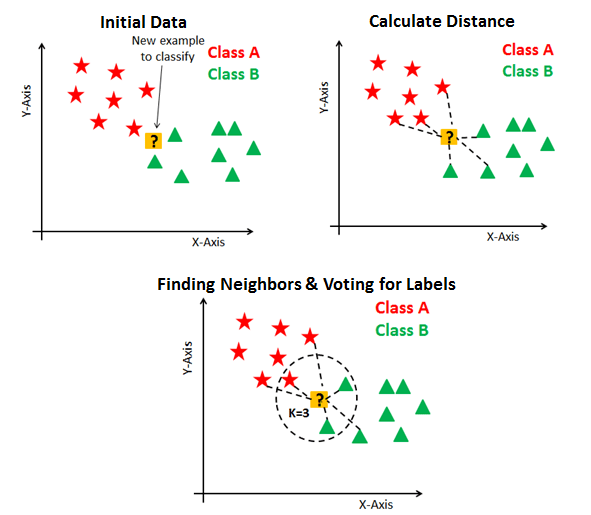

In [20]:
from IPython.display import Image
Image('images/knn.png')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
# knn.fit(X_train,y_train)
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# y_pred_knn = knn.predict(X_test)
y_pred_knn = knn.predict(X_test_sc)

In [25]:
y_test.shape

(57, 1)

In [26]:
y_pred_knn.shape

(57,)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
print('Confusion Matrix KNN')
print(confusion_matrix(y_test,y_pred_knn))

Confusion Matrix KNN
[[ 7  1  0  0]
 [ 0 13  4  0]
 [ 0  4 14  2]
 [ 0  0  2 10]]


In our example, the model correctly predicted 7 instances as class 1, 13 instances as class 2, 14 instances as class 3, and 10 instances as class 4. The model also made 1 incorrect prediction of class 1 as class 2, 4 incorrect predictions of class 2 as class 3, 4 incorrect predictions of class 3 as class 2, 2 incorrect predictions of class 3 as class 4, and 2 incorrect predictions of class 4 as class 3.

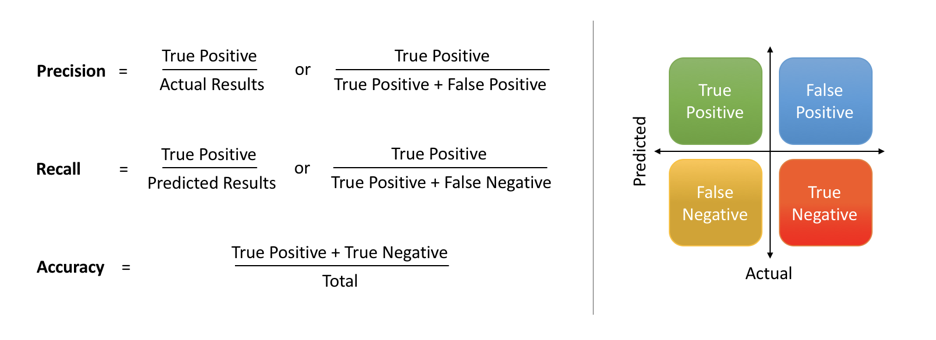

In [29]:
Image('images/metrics.png')

In [30]:
print('Accuracy score KNN {}'.format(accuracy_score(y_test,y_pred_knn)))
accuracy_knn=accuracy_score(y_test,y_pred_knn)

Accuracy score KNN 0.7719298245614035


In [31]:
from sklearn.metrics import recall_score, precision_score,f1_score

In [32]:
print('Precision score KNN {}'.format(precision_score(y_test,y_pred_knn,average='macro')))
print('Recall score KNN {}'.format(recall_score(y_test,y_pred_knn,average='macro')))
print('f1-score score KNN {}'.format(f1_score(y_test,y_pred_knn,average='macro')))

Precision score KNN 0.813888888888889
Recall score KNN 0.7932598039215687
f1-score score KNN 0.8023809523809523


In [33]:
print('Precision score KNN {}'.format(precision_score(y_test,y_pred_knn,average='micro')))
print('Recall score KNN {}'.format(recall_score(y_test,y_pred_knn,average='micro')))
print('f1-score score KNN {}'.format(f1_score(y_test,y_pred_knn,average='micro')))

Precision score KNN 0.7719298245614035
Recall score KNN 0.7719298245614035
f1-score score KNN 0.7719298245614035


<b>average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’</b>

This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

- <b>'binary':</b>Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
- <b>'micro':</b>Calculate metrics globally by counting the total true positives, false negatives and false positives.
- <b>'macro':</b>Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- <b>'weighted':</b>Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
- <b>'samples':</b>Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [34]:
from sklearn.metrics import classification_report

In [35]:
print('Classification Report')
print(classification_report(y_test,y_pred_knn))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.72      0.76      0.74        17
           3       0.70      0.70      0.70        20
           4       0.83      0.83      0.83        12

    accuracy                           0.77        57
   macro avg       0.81      0.79      0.80        57
weighted avg       0.78      0.77      0.77        57



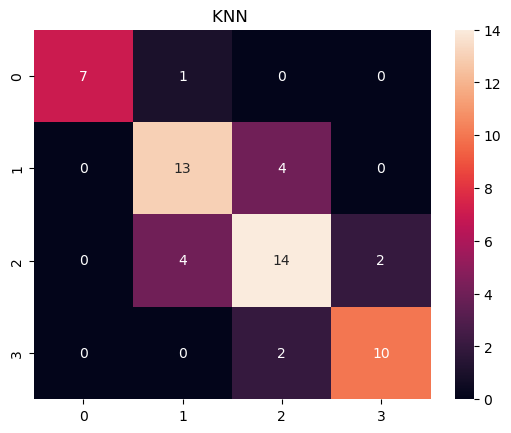

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, fmt='');
title = 'KNN '
plt.title(title);


**Grid search and cross validation**

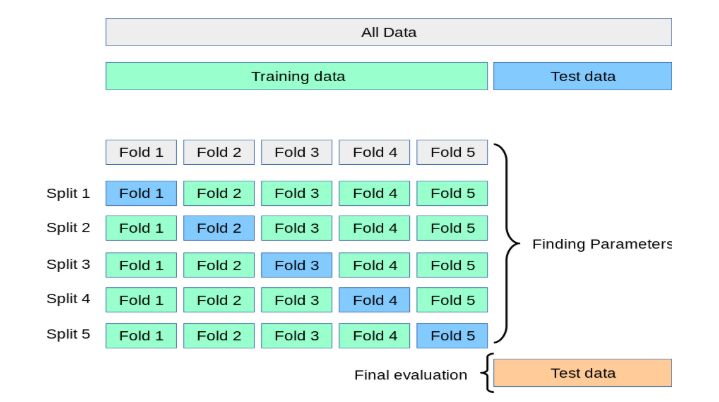

In [37]:
Image('images/grid.png')

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring ='accuracy', cv=4)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 13}
0.8114035087719298


In [39]:
y_pred_knn_optimal = grille.predict(X_test_sc)

In [40]:
print('Optimal KNN Classification Report')
print(classification_report(y_test,y_pred_knn_optimal))

Optimal KNN Classification Report
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.71      0.71      0.71        17
           3       0.71      0.75      0.73        20
           4       0.92      0.92      0.92        12

    accuracy                           0.79        57
   macro avg       0.83      0.81      0.82        57
weighted avg       0.79      0.79      0.79        57



In [41]:
print('Accuracy KNN Grid Search {0:.3f}'.format(accuracy_score(y_test,y_pred_knn_optimal)))
accuracy_knn_grid_search=accuracy_score(y_test,y_pred_knn_optimal)
print('macro')
print('Precision KNN Grid Search {0:.3f}'.format(precision_score(y_test,y_pred_knn_optimal,average='macro')))
from sklearn.metrics import recall_score
print('recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn_optimal,average='macro')))
print('micro')
print('Precision KNN Grid Search {0:.3f}'.format(precision_score(y_test,y_pred_knn_optimal,average='micro')))
from sklearn.metrics import recall_score
print('recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn_optimal,average='micro')))

Accuracy KNN Grid Search 0.789
macro
Precision KNN Grid Search 0.834
recall score 0.812
micro
Precision KNN Grid Search 0.789
recall score 0.789


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)
# dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = dt.predict(X_test)
# y_pred_dt = dt.predict(X_test_sc)

In [45]:
y_data = np.transpose(np.array([y_test.reshape(-1),y_pred_dt]))
y_df = pd.DataFrame(data = y_data, columns = ['y_test','y_pred'])
y_df.head(10)

,y_test,y_pred
0,1,1
1,3,3
2,2,2
3,3,3
4,3,3
5,2,2
6,2,2
7,4,4
8,1,1
9,2,2


In [46]:
print('Accuracy score DT {}'.format(accuracy_score(y_test,y_pred_dt)))
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('macro')
print('Precision score DT {}'.format(precision_score(y_test,y_pred_dt,average='macro')))
print('Recall score DT {}'.format(recall_score(y_test,y_pred_dt,average='macro')))
print('micro')
print('Precision score DT {}'.format(precision_score(y_test,y_pred_dt,average='micro')))
print('Recall score DT {}'.format(recall_score(y_test,y_pred_dt,average='micro')))

Accuracy score DT 1.0
macro
Precision score DT 1.0
Recall score DT 1.0
micro
Precision score DT 1.0
Recall score DT 1.0


In [47]:
print('Classification Report DT')
print(classification_report(y_test,y_pred_dt))

Classification Report DT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        12

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



**Visualization**

In [48]:
!pip install graphviz

In [49]:
import graphviz

In [50]:
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [51]:
features_copy

['Availability',
 'Throughput',
 'Successability',
 'Compliance',
 'Best_Practices',
 'Latency',
 'Documentation',
 'WsRF',
 'Reliability',
 'Response_Time']

[Text(0.5, 0.8333333333333334, 'WsRF <= 70.5\ngini = 0.708\nsamples = 228\nvalue = [24, 79, 79, 46]'),
 Text(0.25, 0.5, 'WsRF <= 60.5\ngini = 0.465\nsamples = 125\nvalue = [0, 0, 79, 46]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 0, 46]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 79\nvalue = [0, 0, 79, 0]'),
 Text(0.75, 0.5, 'WsRF <= 80.0\ngini = 0.357\nsamples = 103\nvalue = [24, 79, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 79\nvalue = [0, 79, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0, 0]')]

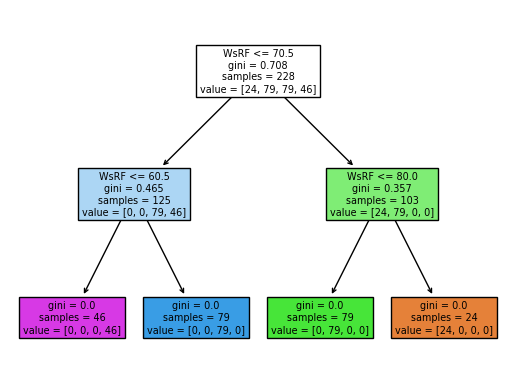

In [52]:
tree.plot_tree(dt,
feature_names = features_copy,
filled = True)

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [55]:
y_pred_lr = lr.predict(X_test_sc)

In [56]:
print('Accuracy score LR {}'.format(accuracy_score(y_test,y_pred_lr)))
accuracy_lr=accuracy_score(y_test,y_pred_lr)
print('macro')
print('Precision score LR {}'.format(precision_score(y_test,y_pred_lr,average='macro')))
print('Recall score LR {}'.format(recall_score(y_test,y_pred_lr,average='macro')))
print('micro')
print('Precision score LR {}'.format(precision_score(y_test,y_pred_lr,average='micro')))
print('Recall score LR {}'.format(recall_score(y_test,y_pred_lr,average='micro')))

Accuracy score LR 0.9122807017543859
macro
Precision score LR 0.9305555555555556
Recall score LR 0.9080882352941176
micro
Precision score LR 0.9122807017543859
Recall score LR 0.9122807017543859


In [57]:
print('Classification Report LR')
print(classification_report(y_test,y_pred_lr))

Classification Report LR
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.94        17
           3       0.83      1.00      0.91        20
           4       1.00      0.75      0.86        12

    accuracy                           0.91        57
   macro avg       0.93      0.91      0.91        57
weighted avg       0.93      0.91      0.91        57



### Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
#svm = SVC(kernel = 'rbf')
svm = SVC(kernel = 'linear')
svm.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [59]:
y_pred_svm = svm.predict(X_test_sc)

In [60]:
print('Accuracy score SVM {}'.format(accuracy_score(y_test,y_pred_svm)))
accuracy_svm_linear=accuracy_score(y_test,y_pred_svm)
print('macro')
print('Precision score SVM {}'.format(precision_score(y_test,y_pred_svm,average='macro')))
print('Recall score SVM {}'.format(recall_score(y_test,y_pred_svm,average='macro')))
print('micro')
print('Precision score SVM {}'.format(precision_score(y_test,y_pred_svm,average='micro')))
print('Recall score SVM {}'.format(recall_score(y_test,y_pred_svm,average='micro')))


Accuracy score SVM 0.9122807017543859
macro
Precision score SVM 0.9172979797979798
Recall score SVM 0.9225490196078431
micro
Precision score SVM 0.9122807017543859
Recall score SVM 0.9122807017543859


In [61]:
print('Classification Report SVM')
print(classification_report(y_test,y_pred_svm))

Classification Report SVM
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.82      0.90        17
           3       0.86      0.95      0.90        20
           4       0.92      0.92      0.92        12

    accuracy                           0.91        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.92      0.91      0.91        57



### Random Forest

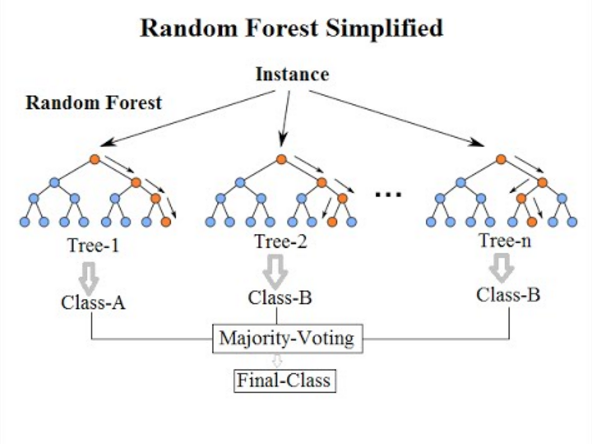

In [62]:
Image('images/random_forest.png')

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [64]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [65]:
y_pred_rf = rf.predict(X_test)

In [66]:
print('Accuracy score RF {}'.format(accuracy_score(y_test,y_pred_rf)))
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('macro')
print('Precision score RF {}'.format(precision_score(y_test,y_pred_rf,average='macro')))
print('Recall score RF {}'.format(recall_score(y_test,y_pred_rf,average='macro')))
print('micro')
print('Precision score RF {}'.format(precision_score(y_test,y_pred_rf,average='micro')))
print('Recall score RF {}'.format(recall_score(y_test,y_pred_rf,average='micro')))

Accuracy score RF 1.0
macro
Precision score RF 1.0
Recall score RF 1.0
micro
Precision score RF 1.0
Recall score RF 1.0


In [67]:
print('Classification Report RF')
print(classification_report(y_test,y_pred_rf))

Classification Report RF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        12

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



### ROC curve (Receiver Operating Characteristic)

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

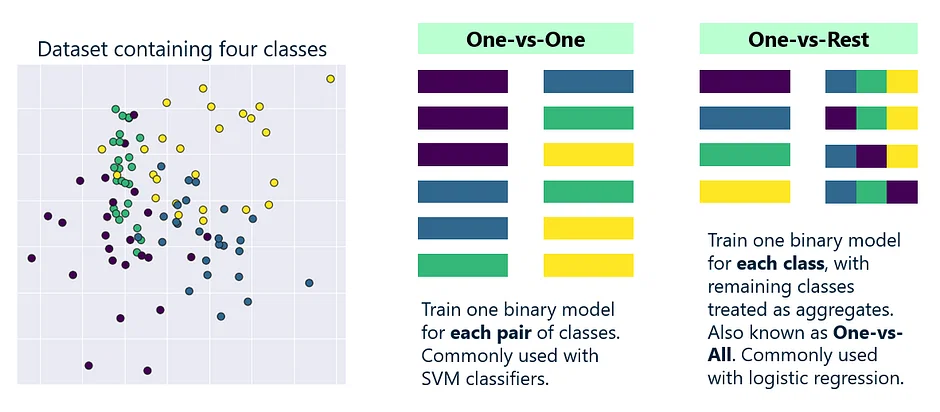

In [68]:
Image('images/image_504965436171642418833831.png')

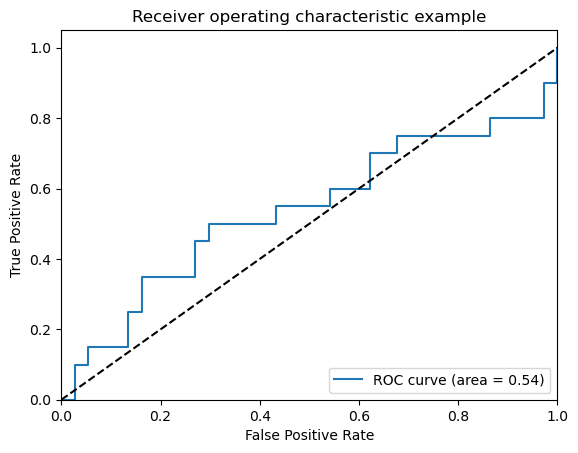

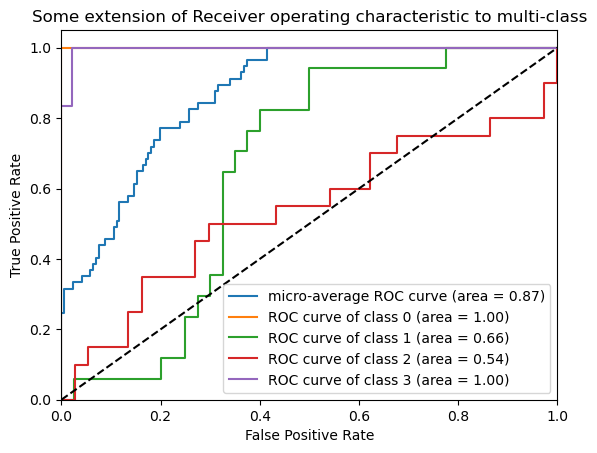

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

# Import some data to play with
X = X_copy.values
y = y_copy.values

# Binarize the output
y = label_binarize(y, classes=[1, 2, 3,4])
n_classes = y.shape[1]



# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [70]:
tab= {'Classifier':['KNN','KNN_GridSearch','Logistic Regression','Decision Tree','RandomForest','svm linear'],
      'Accuracy':[accuracy_knn,accuracy_knn_grid_search,accuracy_lr,accuracy_dt,accuracy_rf,accuracy_svm_linear]}
Conclusion= pd.DataFrame(data=tab)
Conclusion

,Classifier,Accuracy
0,KNN,0.771930
1,KNN_GridSearch,0.789474
2,Logistic Regression,0.912281
3,Decision Tree,1.000000
4,RandomForest,1.000000
5,svm linear,0.912281


<Axes: xlabel='Classifier'>

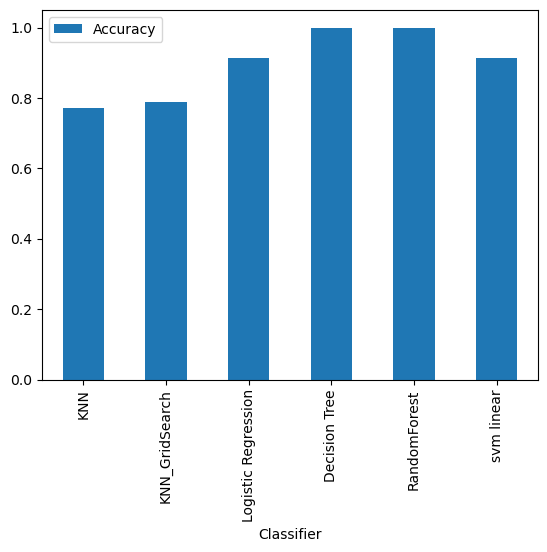

In [71]:
Conclusion.plot(kind='bar',x='Classifier',y='Accuracy')

### Feature Selection

<b>Feature Selection</b>

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

- <b>Reduces Overfitting:</b> Less redundant data means less opportunity to make decisions based on noise.
- <b>Improves Accuracy:</b> Less misleading data means modeling accuracy improves.
- <b>Reduces Training Time:</b> Less data means that algorithms train faster.

In [72]:
importances = rf.feature_importances_

In [73]:
importances

array([0.04911415, 0.04719821, 0.05524897, 0.0102698 , 0.01855429,
       0.04653286, 0.0609379 , 0.54949438, 0.1015457 , 0.06110375])

In [74]:
features

['Availability',
 'Throughput',
 'Successability',
 'Compliance',
 'Best_Practices',
 'Latency',
 'Documentation',
 'WsRF',
 'Reliability',
 'Response_Time']

In [75]:
## sort the importance and get the index 
sorted_idx = np.argsort(importances)
sorted_idx

array([3, 4, 5, 1, 0, 2, 6, 9, 8, 7])

In [76]:
## Convert features to array
features_arr = np.asarray(features)


Text(0.5, 1.0, 'Features importance')

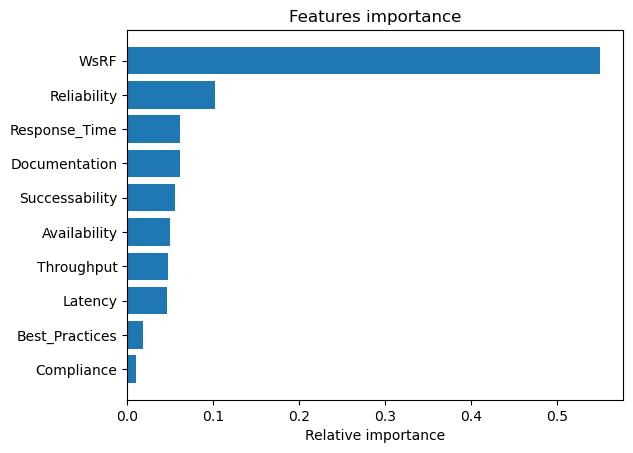

In [77]:
features_index = np.arange(len(features))  ## [0 1 2 3 4 5 6 7 8 9]
plt.barh(features_index, importances[sorted_idx])
plt.yticks(features_index, features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Features importance')

##### RFE with random forest Classifier

Recursive Feature Elimination is the process of iteratively finding the most relevant features from the parameters of a learnt ML model. The model used for RFE could vary based on the problem at hand and the dataset. Popular models that could be used include Linear Regression, Logistic Regression, Decision Trees, Random Forests and so on.


In [78]:
print(X)
print(type(X))

[[100.    14.6   88.   ...  93.    85.5   71.75]
 [100.    23.4   83.   ...  90.    88.   117.  ]
 [100.     5.4   83.   ...  90.    79.3   70.  ]
 ...
 [ 56.     6.    33.   ...  47.    40.2  450.25]
 [ 54.     4.2   15.   ...  43.    17.2  762.23]
 [ 45.     2.    25.   ...  40.    33.4  393.57]]
<class 'numpy.ndarray'>


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X,y,features,target=cleanData('Classification')
datasetNumerical=X
X = X.values
y = y.values

# Create a Random Forest Classifier
estimator = RandomForestClassifier(n_estimators=100, random_state=1)

# Use RFE to select the most important features
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

# Print the selected features
print(datasetNumerical.columns)
print(selector.support_)

print("\033[1m"+'Most important features selected By RFE:'+"\033[0m")
for i in range(0,len(selector.support_)):
    if selector.support_[i]==True:
        print(datasetNumerical.columns[i])




Index(['Availability', 'Throughput', 'Successability', 'Compliance',
       'Best_Practices', 'Latency', 'Documentation', 'WsRF', 'Reliability',
       'Response_Time'],
      dtype='object')
[False False  True False False False  True  True  True  True]
Most important features selected By RFE:
Successability
Documentation
WsRF
Reliability
Response_Time


#### Backward Elimination

In [80]:
# Train an initial logistic regression model using all features
X,y,features,target=cleanData('Classification')
model = LogisticRegression()
model.fit(X, y)

# Evaluate the initial model using accuracy
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

columnnames=["Response_Time" , "Availability" , "Throughput" , "Successability" , "Reliability","Compliance",  "Best_Practices" , "Latency" , "Documentation"  ,"WsRF"  ]
# Perform backward elimination
while True:
    # Get the p-values for each feature
    p_values = model.coef_[0]
    print(p_values)
    # Identify the feature with the highest p-value
    feature_to_remove = np.argmax(p_values)
    print(feature_to_remove)
    # Remove the feature from X
    print(X)
    print(columnnames[feature_to_remove])
    print(X[columnnames[feature_to_remove]])
    X.drop(columns=columnnames[feature_to_remove], inplace=True)
    columnnames.pop(feature_to_remove)
   
    print(columnnames)
    #X = np.delete(np.array(X), feature_to_remove, axis=1)
    # Train a new model using the remaining features
    model = LogisticRegression()
    model.fit(X, y)
    # Evaluate the new model using accuracy
    y_pred = model.predict(X)
    new_accuracy = accuracy_score(y, y_pred)
    print("accuracy:",accuracy)
    print("newaccuracy:",new_accuracy)
    # Check if the performance has improved
    if new_accuracy >= accuracy:
        accuracy = new_accuracy
    else:
        # Stop if the performance has not improved
        break

# Print the selected features
print("Selected features:", X.columns)

[-0.00509039  0.24676152  0.18013832 -0.03605964 -0.16596173  0.063911
  0.08493919  0.08527251  0.01710506 -0.11814904]
1
     Availability  Throughput  Successability  Compliance  Best_Practices  \
1             100        14.6              88        78.0              80   
2             100        23.4              83       100.0              87   
4             100         5.4              83       100.0              75   
5             100        18.2              80        78.0              84   
8             100        13.7              80        78.0              83   
..            ...         ...             ...         ...             ...   
356            65         2.2              57        89.0              83   
357            59         4.3              51        78.0              80   
359            56         6.0              33        78.0              88   
365            54         4.2              15        89.0              84   
368            45         2.0 

#### After Feature selection

Random Forest: 'WsRF' ,'Reliability','Successability','Documentation','Availability','Response_Time','Throughput'

RFE random forest:'Response_Time','Availability','Successability','Reliability','WsRF'

Backward Logistic reg:'Response_Time', 'Availability', 'Reliability', 'Compliance','Best_Practices', 'Latency', 'Documentation', 'WsRF'

Selected feature (most commun are) :'WsRF','Reliability','Response_Time','Successability','Availability'


In [81]:
FS=['WsRF','Reliability','Response_Time','Successability','Availability']

In [82]:
X,y,features,target=cleanData('Classification')
X

,Availability,Throughput,Successability,Compliance,Best_Practices,Latency,Documentation,WsRF,Reliability,Response_Time
1,100,14.6,88,78.0,80,64.42,86,93,85.5,71.75
2,100,23.4,83,100.0,87,111.00,59,90,88.0,117.00
4,100,5.4,83,100.0,75,63.00,91,90,79.3,70.00
5,100,18.2,80,78.0,84,104.60,91,90,92.2,105.20
8,100,13.7,80,78.0,83,62.40,89,89,76.3,99.20
...,...,...,...,...,...,...,...,...,...,...
356,65,2.2,57,89.0,83,423.56,10,48,22.2,451.12
357,59,4.3,51,78.0,80,381.27,34,48,11.9,424.54
359,56,6.0,33,78.0,88,440.50,7,47,40.2,450.25
365,54,4.2,15,89.0,84,726.59,32,43,17.2,762.23


In [83]:
X[FS]

,WsRF,Reliability,Response_Time,Successability,Availability
1,93,85.5,71.75,88,100
2,90,88.0,117.00,83,100
4,90,79.3,70.00,83,100
5,90,92.2,105.20,80,100
8,89,76.3,99.20,80,100
...,...,...,...,...,...
356,48,22.2,451.12,57,65
357,48,11.9,424.54,51,59
359,47,40.2,450.25,33,56
365,43,17.2,762.23,15,54


In [84]:
y 

,Class
1,1
2,1
4,1
5,1
8,1
...,...
356,4
357,4
359,4
365,4


In [85]:
X = X.values
y = y.values

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [87]:
y.mean()

2.642105263157895

In [88]:
y_train.mean()

2.6447368421052633

In [89]:
y_test.mean()

2.6315789473684212

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**K Nearest Neighbors**

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('y_pred_knn',y_pred_knn)
print('Confusion Matrix KNN',confusion_matrix(y_test,y_pred_knn))
print('Accuracy score KNN {}'.format(accuracy_score(y_test,y_pred_knn)))
accuracy_knnFS=accuracy_score(y_test,y_pred_knn)
print('Precision score KNN {}'.format(precision_score(y_test,y_pred_knn,average='macro')))
print('Recall score KNN {}'.format(recall_score(y_test,y_pred_knn,average='macro')))
print('Precision score KNN {}'.format(precision_score(y_test,y_pred_knn,average='micro')))
print('Recall score KNN {}'.format(recall_score(y_test,y_pred_knn,average='micro')))
print('Classification Report')
print(classification_report(y_test,y_pred_knn))

y_pred_knn [1 3 2 3 3 2 2 4 1 2 4 3 1 2 2 3 3 3 3 3 2 3 2 4 2 2 3 3 3 4 4 1 1 3 2 4 2
 3 1 1 2 2 3 2 4 2 2 3 2 4 1 4 4 3 3 3 4]
Confusion Matrix KNN [[ 7  1  0  0]
 [ 1 13  3  0]
 [ 0  4 15  1]
 [ 0  0  2 10]]
Accuracy score KNN 0.7894736842105263
Precision score KNN 0.8140782828282829
Recall score KNN 0.8057598039215687
Precision score KNN 0.7894736842105263
Recall score KNN 0.7894736842105263
Classification Report
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.72      0.76      0.74        17
           3       0.75      0.75      0.75        20
           4       0.91      0.83      0.87        12

    accuracy                           0.79        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.79      0.79      0.79        57



**Grid search and cross validation**

In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,17]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring ='accuracy', cv=10)
grille = clf.fit(X_train,y_train)
print(grille.best_params_)
print(grille.best_score_)
y_pred_knn_optimal = grille.predict(X_test)
print('Optimal KNN Classification Report')
print(classification_report(y_test,y_pred_knn_optimal))
print('Accuracy KNN GS {0:.3f}'.format(accuracy_score(y_test,y_pred_knn_optimal)))
accuracy_knn_grid_searchFS=accuracy_score(y_test,y_pred_knn_optimal)
print('macro')
print('Precision KNN GS {0:.3f}'.format(precision_score(y_test,y_pred_knn_optimal,average='macro')))
from sklearn.metrics import recall_score
print('recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn_optimal,average='macro')))
print('micro')
print('Precision KNN GS {0:.3f}'.format(precision_score(y_test,y_pred_knn_optimal,average='micro')))
from sklearn.metrics import recall_score
print('recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn_optimal,average='micro')))

{'n_neighbors': 13}
0.7883399209486166
Optimal KNN Classification Report
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.71      0.71      0.71        17
           3       0.71      0.75      0.73        20
           4       0.92      0.92      0.92        12

    accuracy                           0.79        57
   macro avg       0.83      0.81      0.82        57
weighted avg       0.79      0.79      0.79        57

Accuracy KNN GS 0.789
macro
Precision KNN GS 0.834
recall score 0.812
micro
Precision KNN GS 0.789
recall score 0.789


**Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Accuracy score DT {}'.format(accuracy_score(y_test,y_pred_dt)))
accuracy_dtFS=accuracy_score(y_test,y_pred_dt)
print('macro')
print('Precision score DT {}'.format(precision_score(y_test,y_pred_dt,average='macro')))
print('Recall score DT {}'.format(recall_score(y_test,y_pred_dt,average='macro')))
print('micro')
print('Precision score DT {}'.format(precision_score(y_test,y_pred_dt,average='micro')))
print('Recall score DT {}'.format(recall_score(y_test,y_pred_dt,average='micro')))
print('Classification Report DT')
print(classification_report(y_test,y_pred_dt))

Accuracy score DT 1.0
macro
Precision score DT 1.0
Recall score DT 1.0
micro
Precision score DT 1.0
Recall score DT 1.0
Classification Report DT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        12

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



**Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy score RF {}'.format(accuracy_score(y_test,y_pred_rf)))
accuracy_rfFS=accuracy_score(y_test,y_pred_rf)
print('macro')
print('Precision score RF {}'.format(precision_score(y_test,y_pred_rf,average='macro')))
print('Recall score RF {}'.format(recall_score(y_test,y_pred_rf,average='macro')))
print('micro')
print('Precision score RF {}'.format(precision_score(y_test,y_pred_rf,average='micro')))
print('Recall score RF {}'.format(recall_score(y_test,y_pred_rf,average='micro')))
print('Classification Report RF')
print(classification_report(y_test,y_pred_rf))

Accuracy score RF 1.0
macro
Precision score RF 1.0
Recall score RF 1.0
micro
Precision score RF 1.0
Recall score RF 1.0
Classification Report RF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        12

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



**Logistic Regression**

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)
y_pred_lr = lr.predict(X_test_sc)
print('Accuracy score LR {}'.format(accuracy_score(y_test,y_pred_lr)))
accuracy_lr_feature_selection=accuracy_score(y_test,y_pred_lr)
print('macro')
print('Precision score LR {}'.format(precision_score(y_test,y_pred_lr,average='macro')))
print('Recall score LR {}'.format(recall_score(y_test,y_pred_lr,average='macro')))
print('micro')
print('Precision score LR {}'.format(precision_score(y_test,y_pred_lr,average='micro')))
print('Recall score LR {}'.format(recall_score(y_test,y_pred_lr,average='micro')))
print('Classification Report LR')
print(classification_report(y_test,y_pred_lr))

Accuracy score LR 0.9122807017543859
macro
Precision score LR 0.9305555555555556
Recall score LR 0.9080882352941176
micro
Precision score LR 0.9122807017543859
Recall score LR 0.9122807017543859
Classification Report LR
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.94        17
           3       0.83      1.00      0.91        20
           4       1.00      0.75      0.86        12

    accuracy                           0.91        57
   macro avg       0.93      0.91      0.91        57
weighted avg       0.93      0.91      0.91        57



**SVM**

In [97]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy score SVM {}'.format(accuracy_score(y_test,y_pred_svm)))
accuracy_svm_linearFS=accuracy_score(y_test,y_pred_svm)
print('macro')
print('Precision score SVM {}'.format(precision_score(y_test,y_pred_svm,average='macro')))
print('Recall score SVM {}'.format(recall_score(y_test,y_pred_svm,average='macro')))
print('micro')
print('Precision score SVM {}'.format(precision_score(y_test,y_pred_svm,average='micro')))
print('Recall score SVM {}'.format(recall_score(y_test,y_pred_svm,average='micro')))
print('Classification Report SVM')
print(classification_report(y_test,y_pred_svm))

Accuracy score SVM 0.9122807017543859
macro
Precision score SVM 0.9172979797979798
Recall score SVM 0.9225490196078431
micro
Precision score SVM 0.9122807017543859
Recall score SVM 0.9122807017543859
Classification Report SVM
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.82      0.90        17
           3       0.86      0.95      0.90        20
           4       0.92      0.92      0.92        12

    accuracy                           0.91        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.92      0.91      0.91        57



In [98]:
tabFS= {'Classifier':['KNN','KNN_GridSearch','Logistic Regression','Decision Tree','RandomForest','svm linear'],
      'Accuracy':[accuracy_knnFS,accuracy_knn_grid_searchFS,accuracy_lr_feature_selection,accuracy_dtFS,accuracy_rfFS,accuracy_svm_linearFS]}
ConclusionFS= pd.DataFrame(data=tabFS)
ConclusionFS

,Classifier,Accuracy
0,KNN,0.789474
1,KNN_GridSearch,0.789474
2,Logistic Regression,0.912281
3,Decision Tree,1.000000
4,RandomForest,1.000000
5,svm linear,0.912281


In [99]:
tabRecap= {'Classifier':['KNN','KNN_GridSearch','Logistic Regression','Decision␣Tree','RandomForest','svm linear'],
      'Accuracy':[accuracy_knn,accuracy_knn_grid_search,accuracy_lr,accuracy_dt,accuracy_rf,accuracy_svm_linear],
       'Accuracy after FS':[accuracy_knnFS,accuracy_knn_grid_searchFS,accuracy_lr_feature_selection,accuracy_dtFS,accuracy_rfFS,accuracy_svm_linearFS]}

ConclusionRecap= pd.DataFrame(data=tabRecap)
ConclusionRecap

,Classifier,Accuracy,Accuracy after FS
0,KNN,0.771930,0.789474
1,KNN_GridSearch,0.789474,0.789474
2,Logistic Regression,0.912281,0.912281
3,Decision␣Tree,1.000000,1.000000
4,RandomForest,1.000000,1.000000
5,svm linear,0.912281,0.912281


<Axes: xlabel='Classifier'>

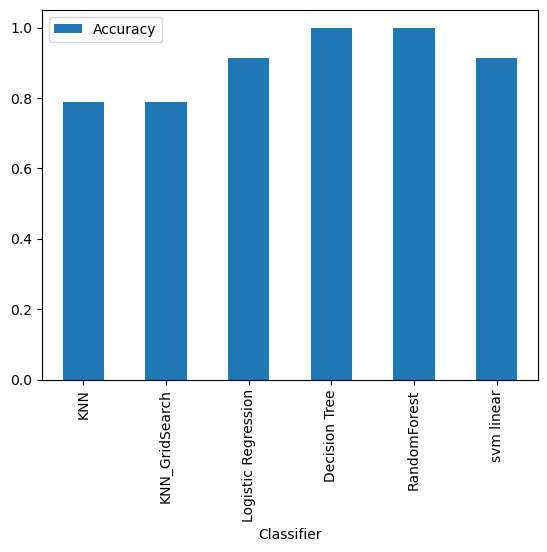

In [100]:
ConclusionFS.plot(kind='bar',x='Classifier',y='Accuracy')